<a href="https://colab.research.google.com/github/J-kingdom/TestData/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [3]:
!wget https://raw.githubusercontent.com/J-kingdom/TestData/main/motormeasure.csv

--2022-01-21 11:22:41--  https://raw.githubusercontent.com/J-kingdom/TestData/main/motormeasure.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14682980 (14M) [text/plain]
Saving to: ‘motormeasure.csv’

motormeasure.csv    100%[===================>]  14.00M  --.-KB/s    in 0.1s    

2022-01-21 11:22:42 (121 MB/s) - ‘motormeasure.csv’ saved [14682980/14682980]



In [11]:
import pandas as pd
data = pd.read_csv('motormeasure.csv')

In [12]:
data.head()

,profile_id,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,2.0,4.191555,18.277140,19.683231,1.471314,19.055927,99.986534,-2.001471,1.098510,24.682858,18.983862,22.117216,0.227945
1,3.0,4.177997,18.686314,19.469255,1.442851,18.717857,99.992607,-2.001272,1.097656,24.121788,18.790005,21.638401,0.171351
2,4.0,-0.876308,17.558941,18.636782,1.191286,18.133976,0.003842,-1.973073,1.083640,22.959057,18.201054,23.646744,0.435272
3,5.0,49.647366,18.024563,19.063377,-0.328863,18.268650,999.919312,-1.999769,1.094671,25.895393,18.141254,22.607321,-0.018755
4,6.0,1.950016,17.215942,19.105661,-1.203019,18.282309,0.040930,-13.719622,62.349945,24.359657,18.210649,23.192780,41.480873


### Q. Define the problem domain

My dataset tracks 185 hrs of recordings from a permanent magnet synchronous motor (PMSM). 

The permanent-magnet synchronous machine (PMSM) drive is one of best choices for a full range of motion control applications. For example, the PMSM is widely used in robotics, machine tools, actuators, and it is being considered in high-power applications such as industrial drives and vehicular propulsion. It is also used for residential/commercial applications. The PMSM is known for having low torque ripple, superior dynamic performance, high efficiency and high power density.

### Q. Identify candidate questions for your machine learning project

In this data, the input is:-
*   Current q-component (i_q)

The output from ML IS Expected to be:
*   Motor torque

It is hard to measure Motor torque reliably and economically once the motor has been fitted into a commercial vehicle.

Being able to have strong estimators of torque therefore, helps the automotive industry in manufacturing motors as it leads to more accurate and adequate control of the motor, reducing power losses and eventual heat build-up.







### Q. Generate a descriptive statistics report for the columns in your dataset

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
profile_id,21.0,16.333333,14.100827,2.000000,7.000000,12.000000,20.000000,53.000000
u_q,21.0,40.571374,49.049185,-0.876308,4.177997,12.224514,62.387093,131.810730
coolant,21.0,21.413039,9.492432,16.402464,18.024563,18.641661,19.052404,49.990061
stator_winding,21.0,39.223496,36.471445,18.636782,19.218100,19.836296,37.630337,131.266937
u_d,21.0,-20.340800,39.491437,-130.902740,-40.327633,-2.123464,-0.328863,40.240081
stator_tooth,21.0,33.306863,26.194328,18.133976,18.287134,19.055927,34.931850,94.466301
motor_speed,21.0,1249.609593,1468.922036,0.003842,99.992607,596.365356,1999.977051,4999.946777
i_d,21.0,-47.981589,65.164023,-231.648453,-67.967697,-13.719622,-2.001272,-0.001518
i_q,21.0,41.526131,112.551767,-289.488192,1.083640,1.103719,101.528008,298.397337
pm,21.0,34.948452,19.500918,21.032412,23.188061,24.682858,43.000011,80.895294


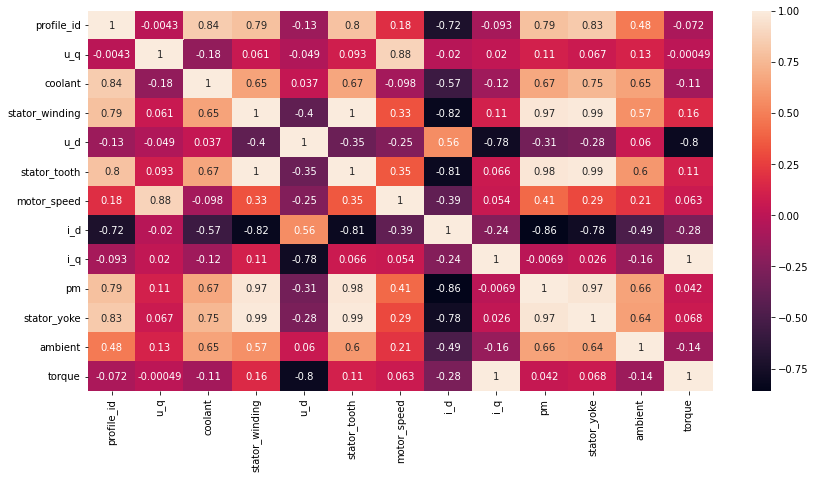

In [14]:
#Generate correlation heatmap, boxplot, and any other graphs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True)

From the heatmap, we can see that torque and i_q (current q component) are pretty much perfectly correlated. I will therefore only use this column for training and testing my model as all other potential inputs have low correlation.

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
#               Missing During trianing        Missing during Test        Action
#MCAR           TRUE                           TRUE                       Missing either way so dont use such Columns
#MNAR           TRUE                           FALSE                      Remove these values from training dataset
#MAR            FALSE                          TRUE                       Don't use the columns for training
#               FALSE                          FALSE                      No missing values i.e nothing to worry about

In [17]:
# null values- first column wise, then row wise
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   profile_id      21 non-null     float64
 1   u_q             21 non-null     float64
 2   coolant         21 non-null     float64
 3   stator_winding  21 non-null     float64
 4   u_d             21 non-null     float64
 5   stator_tooth    21 non-null     float64
 6   motor_speed     21 non-null     float64
 7   i_d             21 non-null     float64
 8   i_q             21 non-null     float64
 9   pm              21 non-null     float64
 10  stator_yoke     21 non-null     float64
 11  ambient         21 non-null     float64
 12  torque          21 non-null     float64
dtypes: float64(13)
memory usage: 104.0 MB


I have no null values and therefore do not need to use the dropna() function.

In [18]:
data.to_csv('cleanmotormeasure.csv')

I am at this point going to be taking my data to Azure Machine learning studio where I will be removing the uneccessary columns and  completing the rest of my tasks.

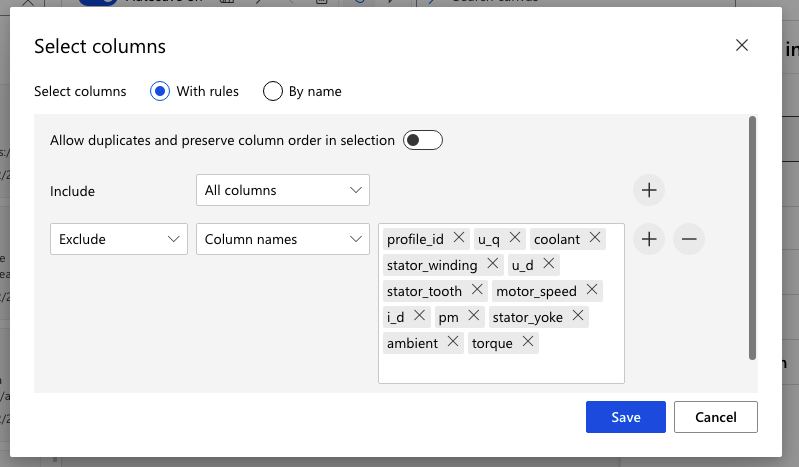

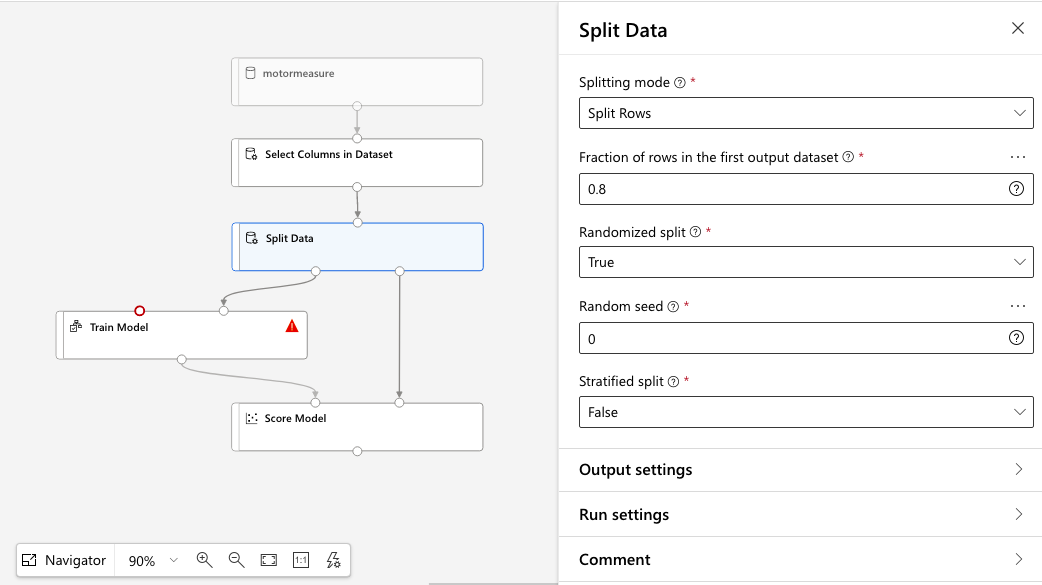

Now that data is fully cleaned, I have split it into training and test data; using 80% of the data for training.

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

Seeing that my input & output are so highly correlated aswell as the fact that my data is continuous as opposed to discrete, I have chosen to go with regression algorithms for training my data

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

Linear Regression Algorithm

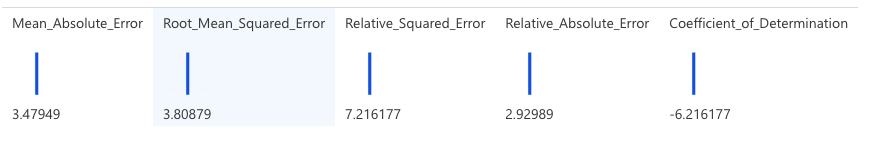

Decision Forest Regression

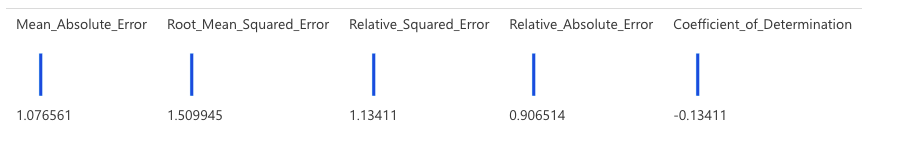

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

I have deployed the Decision Forest Regression model seeing as this model produced lower error numbers in predicting torque values than the Linear Regression model

In [19]:
#LAST STEP - DEPLOYMENT
#Type: Azure Container Instance
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
        "WebServiceInput0":
        [
            {
                'profile_id': "2",
                'u_q': "4.1915555",
                'coolant': "18.27713966",
                'stator_winding': "19.68323135",
                'u_d': "1.471313953",
                'stator_tooth': "19.05592728",
                'motor_speed': "99.98653412",
                'i_d': "-2.001470566",
                'i_q': "1.098510385",
                'pm': "24.68285751",
                'stator_yoke': "18.98386192",
                'ambient': "22.11721611",
                'torque': "0.227944657",
            },
        ],
    },
    "GlobalParameters": {
    }
}

body = str.encode(json.dumps(data))

url = 'http://6b69f643-1eae-45b1-a196-f4489d89f735.uksouth.azurecontainer.io/score'
api_key = 'kGcnMTmBp6Q26PRElT7aq29AdFFYMCjC' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))


b'{"Results": {"WebServiceOutput0": [{"i_q": 1.098510385, "torque": 0.227944657, "Scored Labels": -0.12939923625}]}}'
